<a href="https://colab.research.google.com/github/Adityasingh3008/YES-BANK-STOCK-PRICE-PREDICTION/blob/main/Individual_Notebook_YES_BANK_STOCK_PRICE_PREDICTION_(Capstone_Project_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
# **Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.** 

# **Lets Understand first What is Stock?**
**Stocks are a type of security that gives stockholders a share of ownership in a company. Stocks also are called "Equities". Units of stock are called "Shares". Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors portfolios.**

In [42]:
# Importing all required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [43]:
#  Mounting google drive to load our dataset
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Link the dataset path and read csv file
dataset = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

In [45]:
# Loaded csv file
dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [46]:
# Fetch first five rows by using head() method of dataframe
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [47]:
# Fetch last five rows by using tail() method of dataframe
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [48]:
# Getting information about the datatypes and null values stored at each column by using "info()" method
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [49]:
# Fetch first five rows of feature "Date" by using head() method of dataframe
dataset['Date'].head()

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
Name: Date, dtype: object

* **From the above dataframe we can see that the 'Date' feature is of object data type, so we need to convert it in the date time format and also the format of the date is in MMMM-YY format and we also need to convert it to a proper date time format as YYYY-MM-DD.**

In [50]:
# importing datetime and converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))   

In [51]:
# Fetch first five rows by using head() method of dataframe after converting "Date" column into proper Date format
dataset.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


* **Now the 'Date' feature is converted into a proper datetime format.**

# **Checking Null Values**

In [52]:
# Checking Null Values In Our Dataset
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

* **We can see that there are no null values in our dataset.**

In [53]:
# Creating a copy of a dataframe
df = dataset.copy()

In [54]:
# Set the DataFrame index using existing columns.
df.set_index('Date',inplace=True)

In [55]:
# Fetch first five rows by using head() method of dataframe after set_index method()
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


* **We created a copy of dataframe so that if we apply some conditions or made changes in our dataset it won't affect the original dataset.**

# **Checking Duplicate Values**

In [56]:
#Taking a look at duplicate values
len(df[df.duplicated()])

0

* **As there were no null values there are no duplicate values as well.**

In [57]:
# Analyse the data by looking into various columns i.e. max. , min. , mean etc.
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


* **We have used describe() method for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.**
* **We have also used a transpose method to convert rows into columns and vice versa.**

In [58]:
# Check the various attributes of data like shape(rows and columns), null values,unique values.print ("Rows : " , dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n " ,dataset.columns.tolist())
print ("\nMissing values:", dataset.isnull().sum().values.sum())
print ("\nUnique values :  \n", dataset.nunique())

Columns  :  5

Features : 
  ['Date', 'Open', 'High', 'Low', 'Close']

Missing values: 0

Unique values :  
 Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64


**Conclusion Drawn**:-

* **From the various attributes of data like shape(rows and columns) , null values and unique values, we get to knw that there are 5 columns and there are no missing value in our data and each columns have their respective unique values.**

# **Features/Columns in respective dataset**
 * **Date:-** Date denotes the date of investment( in our data date contains month and year for a particular price)
 * **Open:-** Open means the price at which a stock started trading.
 * **High:-** The high is the highest price at which a stock traded during a period.
 * **Low:-** The low is the minimum price at which a stock traded during a period.
 * **Close:-** The closing price refers to a stock's trading price closed at the end of a trading day.


# **As now we have converted our 'Date' object feature into proper datetime format(There are no categorical features in our dataset) we will take a look at numerical features in our dataset now**

In [59]:
# Fetch all the values of numeric features in our dataset
# Fetch first five rows by using head() method of dataframe
dataset_num = dataset.select_dtypes(exclude=['bool','object'])
dataset_num.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [60]:
# Create a new variable and store the column in that variable
numeric_features = df.columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

# **Data Distribution And Mean and Median Of Each Single Independent variable**

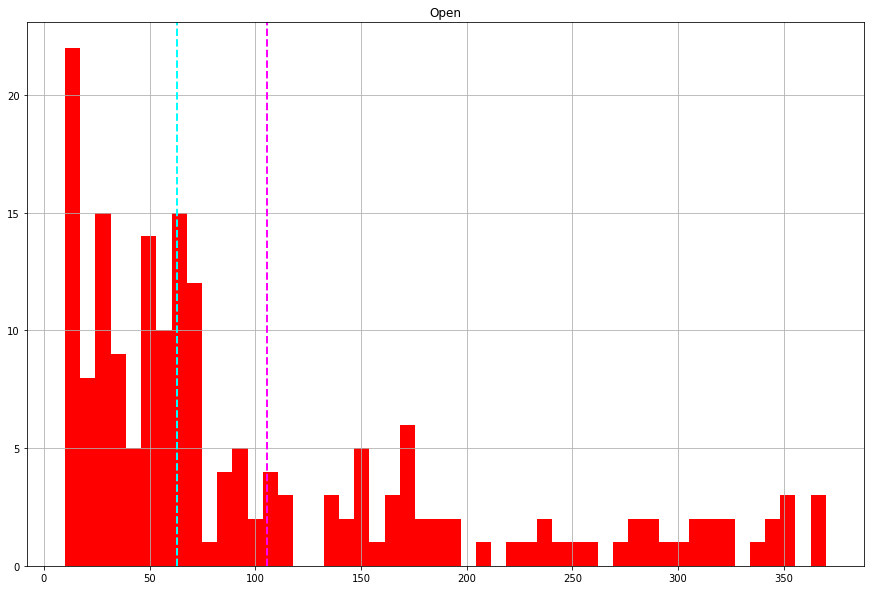

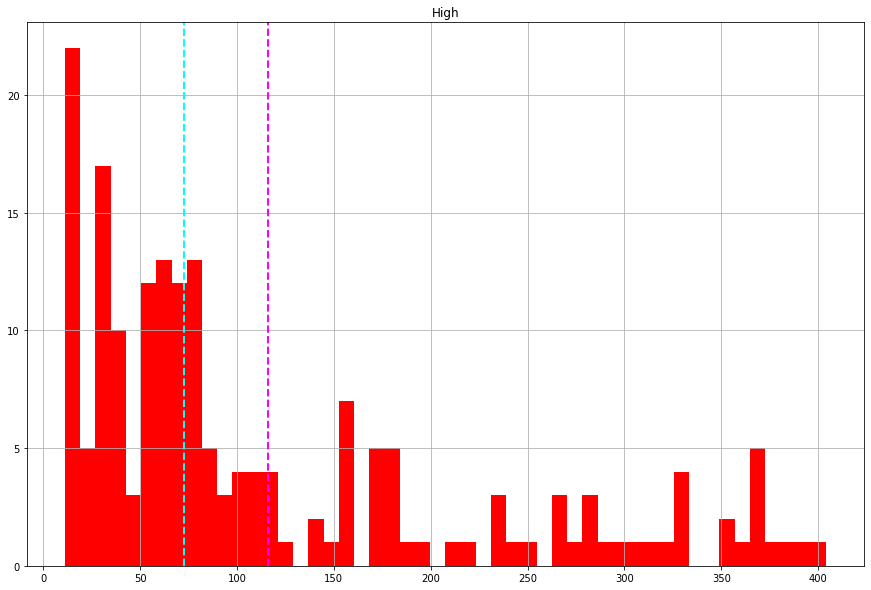

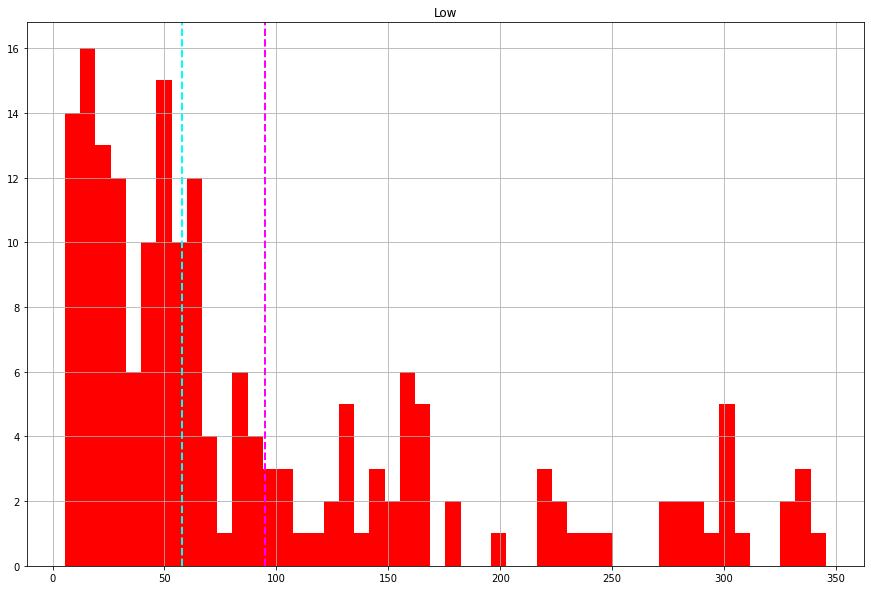

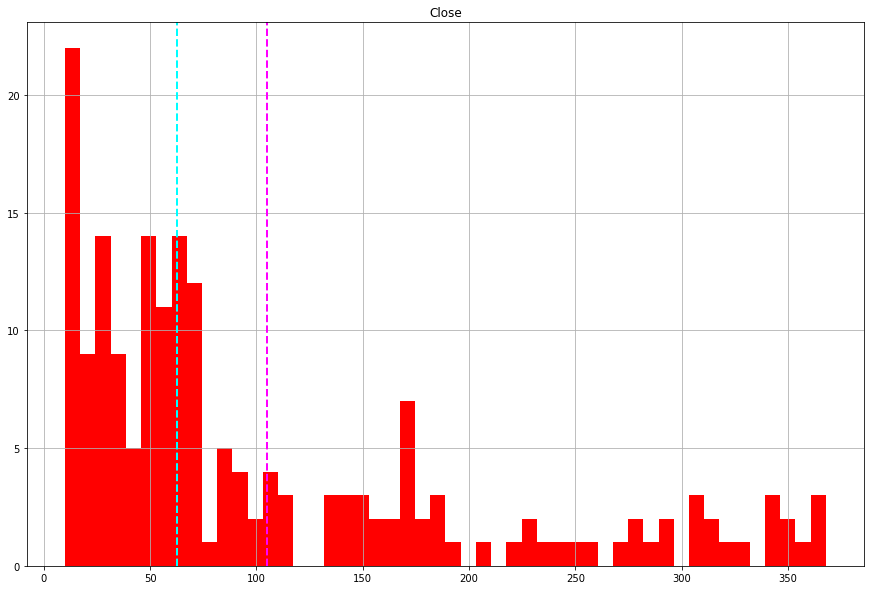

In [61]:
# Plot hist plot for all the numeric features in dataset
for i in numeric_features[:]:
  fig = plt.figure(figsize=(15,10))
  ax = fig.gca()
  num_features = dataset[i]
  label = dataset['Close']
  num_features.hist(bins = 50,ax = ax,color = 'red')
  ax.axvline(num_features.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
  ax.axvline(num_features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(i)

**Conclusion Drawn:-**
* **From the above hist plot we can say that mean is less than median as it is positively skewed and outlier are also present so we need to convert it to a normal distribution curve so that it will result in mean=median and outliers will also be removed from our feature.** 
* **We have used fig.gca() [Get Current Axes] method to get axes.**
* **We have also used vline method to get vertical lines which is depicted by 'Cyan' color for median and 'Magenta' color for mean.**

# **Let Us Explore The Dataset Now : EDA(Exploratory Data Analysis)**

# **Q.1 Plot Distribution Plot For Dependent Feature "Close"?**

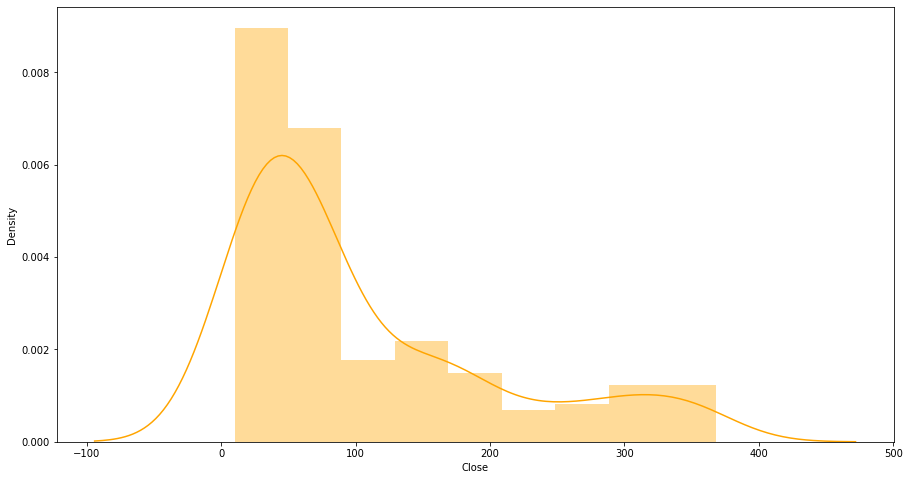

In [62]:
# Distribution Plot For Dependent Feature "Close"
plt.figure(figsize=(15,8))
sns.distplot(dataset['Close'],color='orange')
plt.show()

 **Conclusion Drawn:-**
 * **From the above distribution plot for the feature "Close" we can see that the density was slightly upward than 0.006 between the Close price in the range 0 to 100 [Approx. 50 to 55].**
 * **We can Also Conclude that It is Positively Skewed for the Dependent Feature "Close".**
 * **We can also see that At the density 0.001 the closing price was between [Approx. 200 to 250]. And the density takes a gradual decrease after 350.**

# **Q.2 Plot Boxplot For The Dependent Feature "Close" To Detect Outliers?**

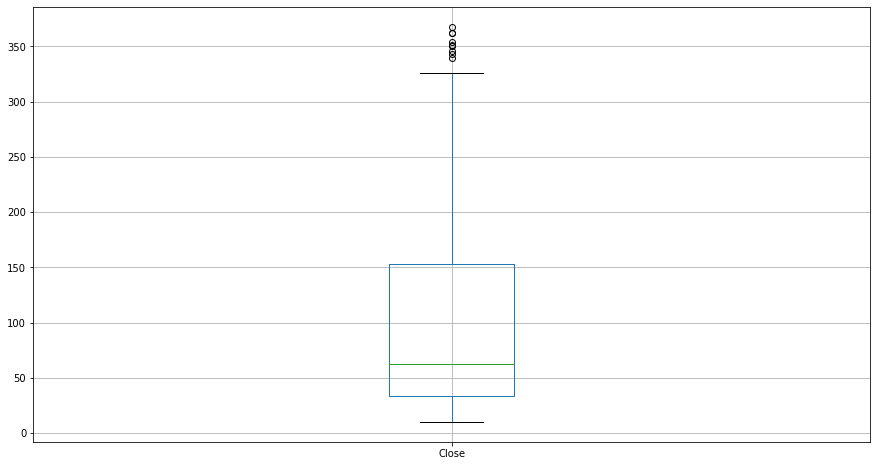

In [63]:
# Boxplot For Dependent Feature "Close"
plt.figure(figsize=(15,8))
dataset.boxplot('Close')
plt.show()

**Conclusion Drawn:-**
* **From the above box plot we can see that as the price increases after 325 it becomes an anomaly[Outlier] for feature "Close".**
* **We can also say that:-**
 * **40 is the mean lower quartile** 
  * **60 is the middle quartile/Median** 
  * **150 is the upper quartile**

# **Q.3 Plot Normal Distribution For The Dependent Feature "Close"?**

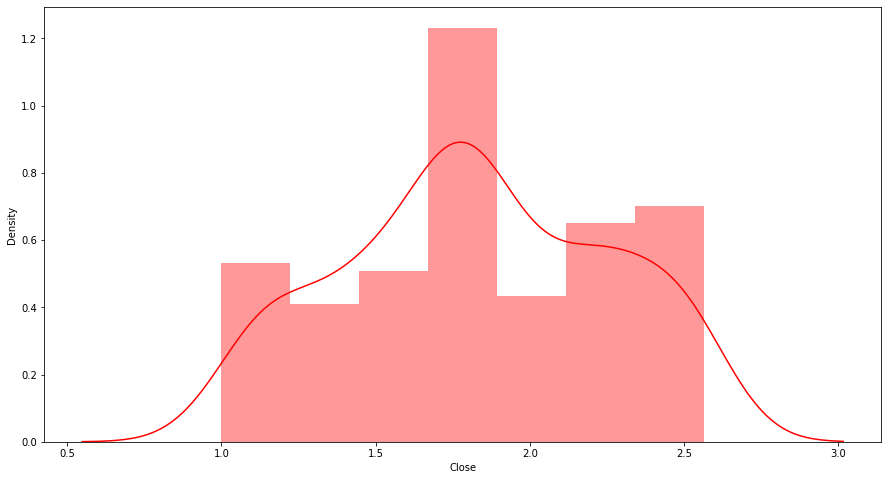

In [64]:
# Normal Distribution For Dependent Feature "Close"
plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Close']),color='Red')
plt.show()

**Conclusion Drawn:-**
* **From the above distplot we can say that it's not a perfectly symmetrical bell shaped curve but it is slightly looks similar to the Normal Distribution Curve.**
* **We have used np.log10() method because it is a mathematical library function used to get the natural logarithm of any object or an array with the base 10. The np. log10() function accepts two arguments and returns the array of natural logarithms of the given array elements where the base is 10.**

# **Q.4 Plot Box Plot Of the Normal Distribution Curve For The Dependent Feature "Close" To See Outliers?**

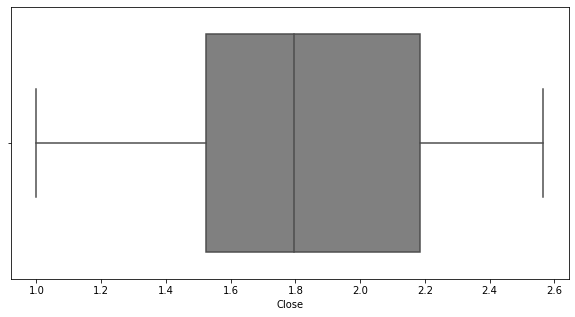

In [65]:
# Boxplot Of The Normal Distribution Curve For The Dependent Feature "Close"
plt.figure(figsize=(10,5))
sns.boxplot(np.log10(dataset['Close']),color='grey')
plt.show()

**Conclusion Drawn:-**
* **From the above boxplot we can see that after applying np.log10() method with feature "Close" we get a normal distribution curve which helps to remove the outliers from the column "Close".**
* **From the boxplot we can also conclude that:-**
    
    * **Lower Quartile (Q1) :- 1.5**
    
    * **Median (Q2) :- 1.8**

    * **Upper Quartile (Q3) :- 2.2**



# **Q.5 Plot Line Plot For Numerical Features In Our Dataset?**

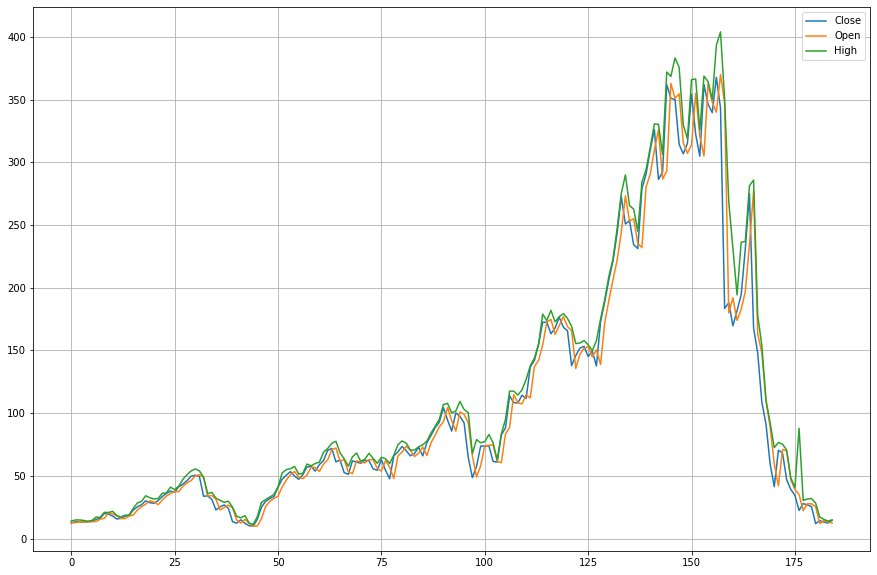

In [70]:
# Plot the Line Plot
plt.figure(figsize=(15,10))
plt.plot(dataset['Close'])
plt.plot(dataset['Open'])
plt.plot(dataset['High'])
plt.legend(['Close','Open','High'])
plt.grid()

**Conclusion Drawn:-**
* **From the above line plot we see that before the 2018 fraud case involving Rana Kapoor the prices of shares were very high and due to this fraudalent activity the market gets very impacted which resulted in low prices of shares after 2018.**
* **We can also conclude that in the year 2020 the prices of share were below 100[Approx. in the range of 80 to 90].**
* **Before 2018 the highest price of was at the peak level of 400 After 2018 Fraud case affected the market very badly which resulted in Gradual decrease in the price of share.**

# **Q.6 Plot Distribution Plot For Independent Features "Open" , "High" , "Low"?**

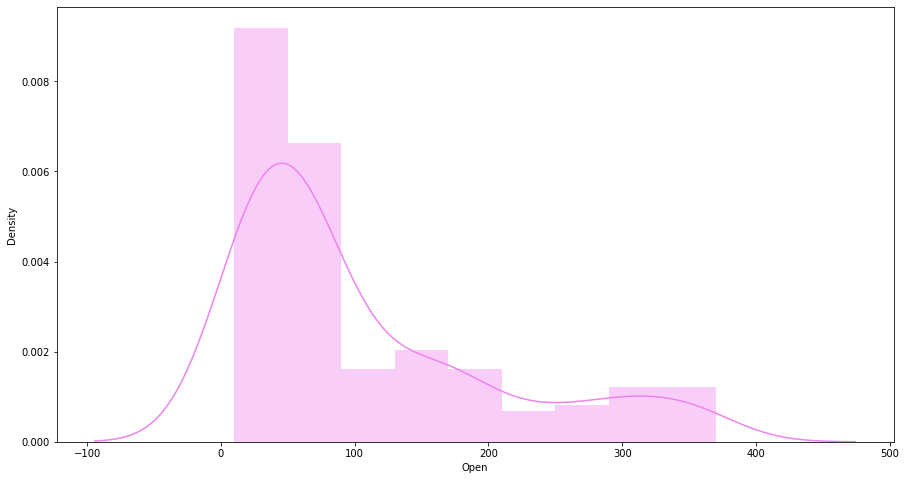

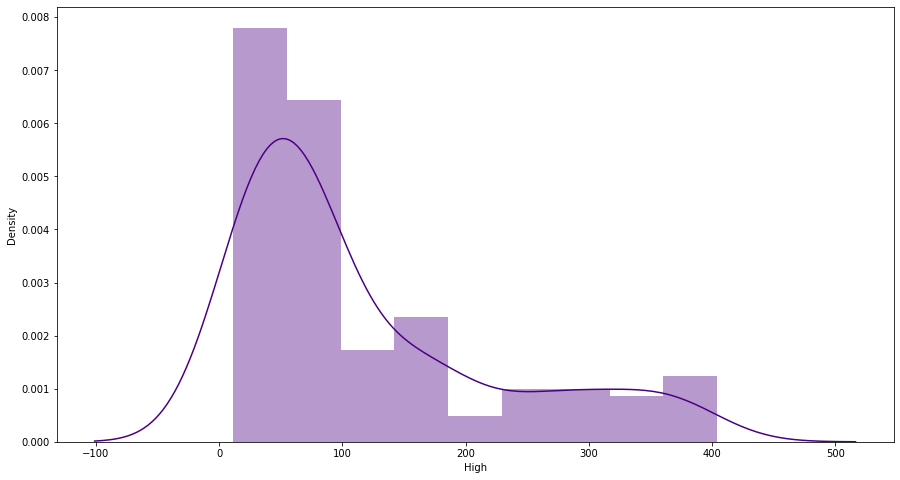

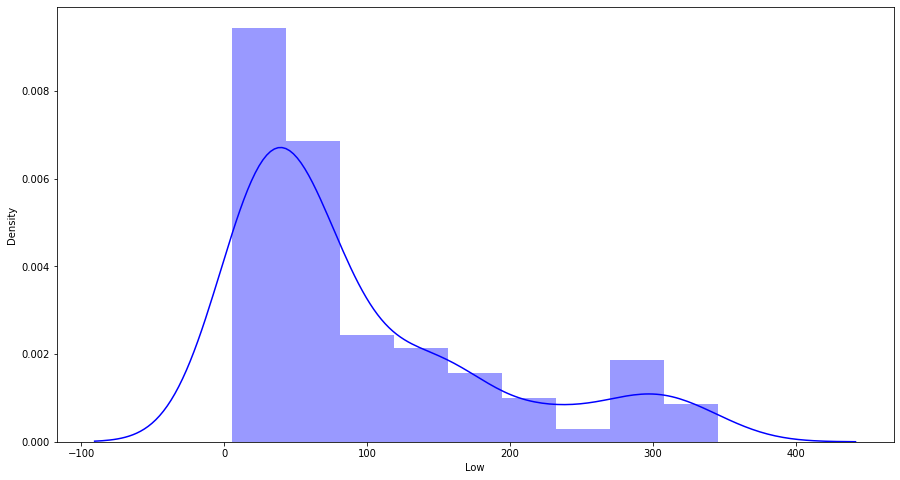

In [71]:
# Distribution Plot For Independent Feature "Open" , "High" , "Low"
plt.figure(figsize=(15,8))
sns.distplot(dataset['Open'], color='violet')

plt.figure(figsize=(15,8))
sns.distplot(dataset['High'], color='indigo')

plt.figure(figsize=(15,8))
sns.distplot(dataset['Low'], color='blue')

**Conclusion Drawn:-**
* **From the above distribution plot for the independent features "Open" , "High" , "Low" we can see that the graph is positively skewed to each other.**
* **We can also conclude that when the price exceeds by 200 there is so much variation for all the independent features.**


# **Q.7 Plot Boxplot For The Independent Features "Open" , "High" , "Low" To Detect Outliers?**

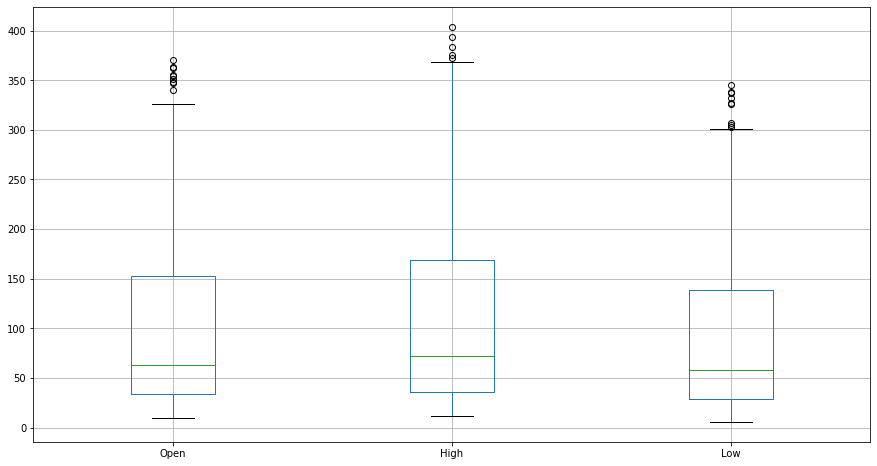

In [72]:
# Boxplot For The Independent Features "Open" , "High" , "Low"
plt.figure(figsize=(15,8))
dataset.boxplot(['Open','High','Low'])
plt.show()

**Conclusion Drawn:-**
* **From the above boxplot of the independent features "Open" , "High" , "Low" we can see that for the feature "Open" as the value exceeds by we have observed an outlier[Anomaly] , similarly for the features "High" and "Low" as the price exceed by 350 [For the feature "High"] and the price above 300 [For the feature "Low"]  we have observed an outlier present in the boxplot.**
* **We can also conclude that there is not so much difference between the Median[Q2] for the independent features "Open" , "High" , "Low".**  